In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

---
**Functions**

In [2]:
def show_corr_columns(columns):
    df_corr = pd.get_dummies(df[columns]).corr().round(2) * 100
    print(df_corr[columns[0]].to_frame().sort_values(by=columns[0], ascending=False))

In [3]:
def show_graph_column_vs_transported(column):
    df_with_transported = df[df['Transported'].notna()]
    sorted_values = df_with_transported[column].value_counts().sort_index().index
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_with_transported, x=column, hue='Transported', order=sorted_values)
    plt.title(f'Transported by {column}')
    plt.show()

In [4]:
def show_boxplot_column(df, column):
    sns.boxplot(df[column])
    plt.title(f'{column} Distribution of Passengers')
    plt.show()

---

In [5]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

I'll concatenate the training and test datasets for preprocessing, because the passengers from the test dataset were on the same spaceship as those from the training dataset, so I'll treat them as a single dataset.

In [6]:
df_combined = pd.concat([train_df, test_df])
df_combined.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [8]:
df_combined.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
df_combined.duplicated().sum()

np.int64(0)

In [10]:
df_combined['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [ ]:
# Replace all False and True values to 0 and 1 in the entire df
df_combined = df_combined.map(lambda x: int(x) if isinstance(x, bool) else x)

In [12]:
df = df_combined.copy()

In this project, I'm going to perform every preprocessing step on each column individually

# Alterations
This section is to modify each column so that I can handle missing values properly <br>
Also, I'm going to drop columns with correlation near 0 with Transported

## PassengerId
"A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always."

In [13]:
df['PassengerId'].head(10)

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
5    0005_01
6    0006_01
7    0006_02
8    0007_01
9    0008_01
Name: PassengerId, dtype: object

In [14]:
# Split PassengerId into 2 columns
df['GroupNumber'] = df['PassengerId'].str.split('_').str[0].astype(int)
df['NumberWithinGroup'] = df['PassengerId'].str.split('_').str[1].astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNumber,NumberWithinGroup
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,1
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,2,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,3,1
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,3,2
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,4,1


In [15]:
show_corr_columns(['Transported', 'GroupNumber'])

             Transported
Transported        100.0
GroupNumber          2.0


In [16]:
show_corr_columns(['Transported', 'NumberWithinGroup'])

                   Transported
Transported              100.0
NumberWithinGroup          7.0


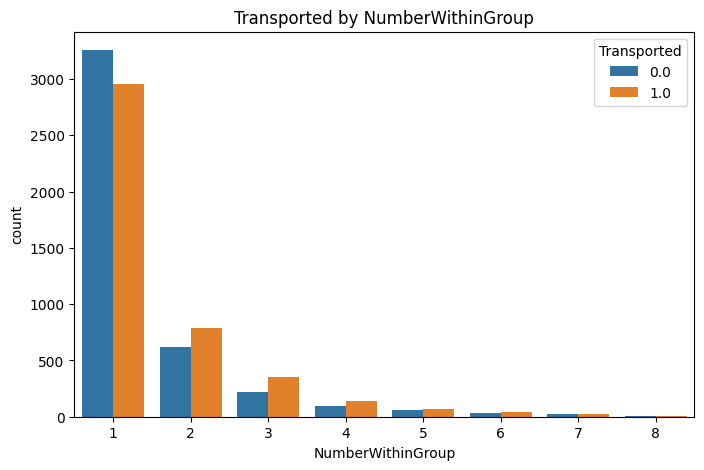

In [17]:
show_graph_column_vs_transported('NumberWithinGroup')

In [ ]:
# Take the GroupSize according to GroupNumber counts
column_group_value_counts = df['GroupNumber'].value_counts()
df['GroupSize'] = df['GroupNumber'].map(column_group_value_counts)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNumber,NumberWithinGroup,GroupSize
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,1,1
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,2,1,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,3,1,2
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,3,2,2
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,4,1,1


In [19]:
show_corr_columns(['Transported', 'GroupSize'])

             Transported
Transported        100.0
GroupSize            8.0


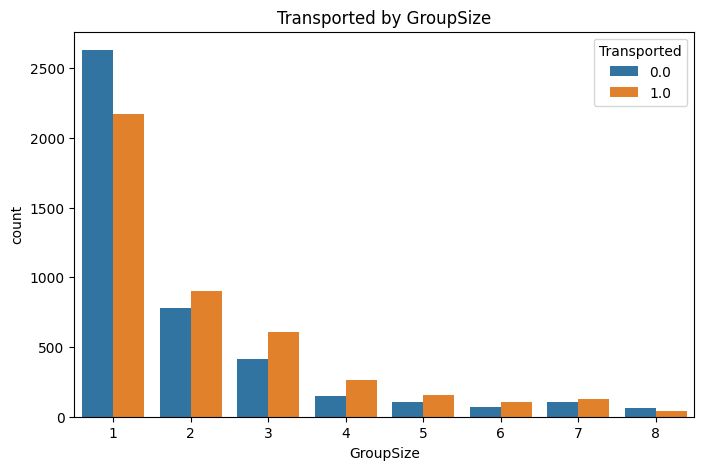

In [20]:
show_graph_column_vs_transported('GroupSize')

Since "NumberWithinGroup" and "GroupSize" are similar, I'll drop the one with the lower correlation with the 'Transported'

In [21]:
show_corr_columns(['Transported', 'NumberWithinGroup', 'GroupSize'])

                   Transported
Transported              100.0
GroupSize                  8.0
NumberWithinGroup          7.0


In [22]:
df.drop(columns='NumberWithinGroup', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  float64
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  float64
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   float64
 14  GroupNumber   12970 non-null  int64  
 15  GroupSize     12970 non-null  int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 1.7+ MB


In [ ]:
# Drop PassengerId and GroupNumber because they aren't needed anymore
df.drop(columns=['PassengerId', 'GroupNumber'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  float64
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  float64
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Name          12676 non-null  object 
 12  Transported   8693 non-null   float64
 13  GroupSize     12970 non-null  int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 1.5+ MB


**New column "Companion"** <br>
Based on GroupSize to see if it improve the correlation with Transported <br>
0 - alone <br>
1 - not alone <br>

In [24]:
df['Companion'] = np.where(df['GroupSize'] == 1, 0, 1)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Companion
0,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,0
1,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,0
2,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,2,1
3,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,2,1
4,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,0


In [25]:
show_corr_columns(['Transported', 'Companion'])

             Transported
Transported        100.0
Companion           11.0


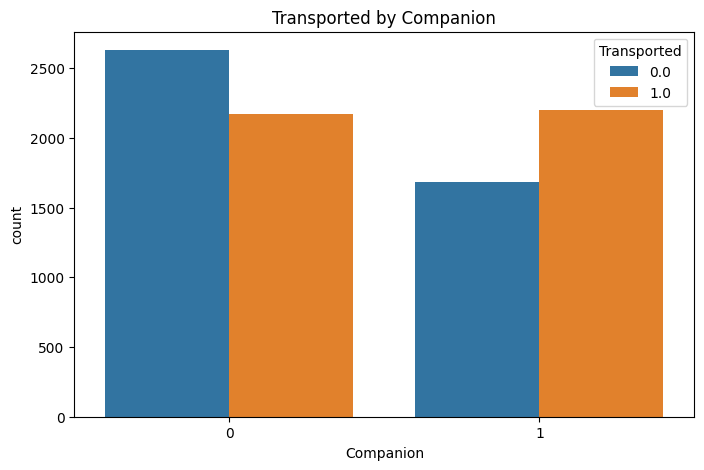

In [26]:
show_graph_column_vs_transported('Companion')

## HomePlanet
"The planet the passenger departed from, typically their planet of permanent residence."


In [27]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     6865
Europa    3133
Mars      2684
Name: count, dtype: int64

In [28]:
show_corr_columns(['Transported', 'HomePlanet'])

                   Transported
Transported              100.0
HomePlanet_Europa         18.0
HomePlanet_Mars            2.0
HomePlanet_Earth         -17.0


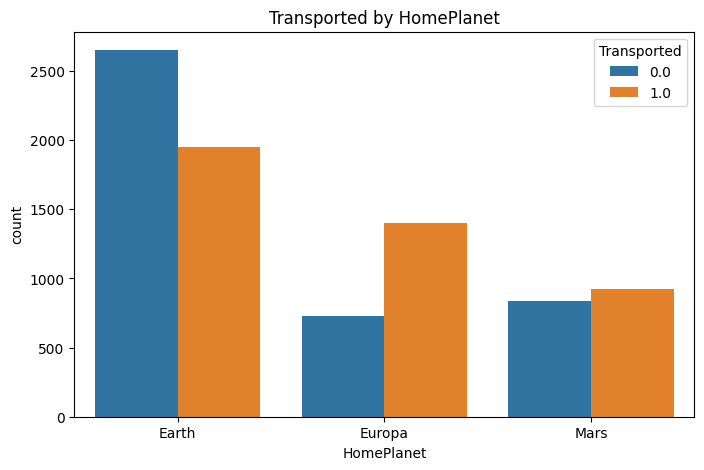

In [29]:
show_graph_column_vs_transported('HomePlanet')

Changing HomePlanet names to values according to transported rates:<br>
Europa - 1 <br>
Mars - 2 <br>
Earth - 3 <br>

In [30]:
df['HomePlanet'] = df['HomePlanet'].map({'Europa': 1, 'Mars': 2, 'Earth': 3})
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Companion
0,1.0,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,0
1,3.0,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,0
2,1.0,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,2,1
3,1.0,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,2,1
4,3.0,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,0


In [31]:
df['HomePlanet'].value_counts()

HomePlanet
3.0    6865
1.0    3133
2.0    2684
Name: count, dtype: int64

In [32]:
show_corr_columns(['Transported', 'HomePlanet'])

             Transported
Transported        100.0
HomePlanet         -20.0


## CryoSleep 
"Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins."


In [33]:
df['CryoSleep'].value_counts()

CryoSleep
0.0    8079
1.0    4581
Name: count, dtype: int64

In [34]:
show_corr_columns(['Transported', 'CryoSleep'])

             Transported
Transported        100.0
CryoSleep           47.0


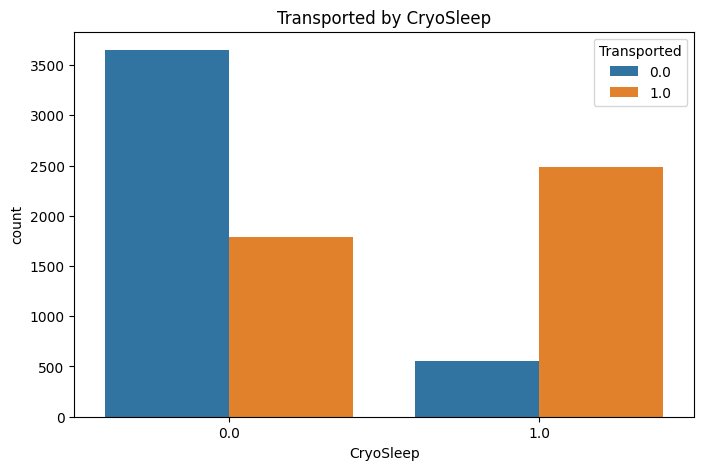

In [35]:
show_graph_column_vs_transported('CryoSleep')

Nothing to change

## Cabin
"The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard."

In [36]:
df['Cabin'].value_counts()

Cabin
G/734/S     8
G/160/P     8
B/11/S      7
G/109/P     7
C/137/S     7
           ..
F/0/P       1
F/1/S       1
B/0/P       1
E/591/P     1
F/1790/S    1
Name: count, Length: 9825, dtype: int64

In [37]:
df['Cabin'].head(10)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [38]:
# Split Cabin into 3 columns
column_cabin_splited = df['Cabin'].str.split('/').str
df['CabinDeck'] = column_cabin_splited[0]
df['CabinNum'] = column_cabin_splited[1]
df['CabinSide'] = column_cabin_splited[2]
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Companion,CabinDeck,CabinNum,CabinSide
0,1.0,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,0,B,0,P
1,3.0,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,0,F,0,S
2,1.0,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,2,1,A,0,S
3,1.0,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,2,1,A,0,S
4,3.0,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,0,F,1,S


In [39]:
# Column isn't needed anymore
df.drop(columns='Cabin', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  float64
 1   CryoSleep     12660 non-null  float64
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  float64
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Name          12676 non-null  object 
 11  Transported   8693 non-null   float64
 12  GroupSize     12970 non-null  int64  
 13  Companion     12970 non-null  int64  
 14  CabinDeck     12671 non-null  object 
 15  CabinNum      12671 non-null  object 
 16  CabinSide     12671 non-null  object 
dtypes: float64(10), int64(2), object(5)
memory usage: 1.8+ MB


In [40]:
df['CabinDeck'].value_counts()

CabinDeck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

In [41]:
show_corr_columns(['Transported', 'CabinDeck'])

             Transported
Transported        100.0
CabinDeck_B         14.0
CabinDeck_C         11.0
CabinDeck_G          2.0
CabinDeck_A         -0.0
CabinDeck_T         -1.0
CabinDeck_D         -3.0
CabinDeck_F         -9.0
CabinDeck_E        -10.0


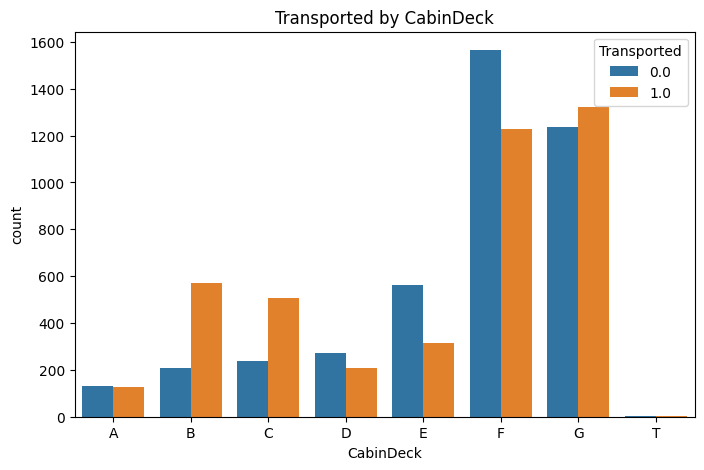

In [42]:
show_graph_column_vs_transported('CabinDeck')

---

In [43]:
df['CabinNum'].value_counts()

CabinNum
82      34
56      28
4       28
230     27
95      27
        ..
1882     1
1883     1
1885     1
1887     1
1623     1
Name: count, Length: 1894, dtype: int64

In [44]:
df_without_nan = df.copy()
df_without_nan = df_without_nan[df_without_nan['CabinNum'].notna()]
df_without_nan['CabinNum'] = df_without_nan['CabinNum'].astype(int)
df_without_nan.query("CabinNum < 600")['Transported'].value_counts()

Transported
1.0    2529
0.0    2519
Name: count, dtype: int64

In [45]:
df_without_nan.query("CabinNum >= 600 and CabinNum <= 1200")['Transported'].value_counts()

Transported
1.0    1133
0.0     839
Name: count, dtype: int64

In [46]:
df_without_nan.query("CabinNum > 1200")['Transported'].value_counts()

Transported
0.0    858
1.0    616
Name: count, dtype: int64

In [47]:
df_without_nan.query("CabinNum >= 600")['Transported'].value_counts()

Transported
1.0    1749
0.0    1697
Name: count, dtype: int64

CabinNum contains many unique values, and I couldn't find any correlation between the cabin number and transported, so I'm dropping this column

In [48]:
df.drop(columns='CabinNum', inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Companion,CabinDeck,CabinSide
0,1.0,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,0,B,P
1,3.0,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,0,F,S
2,1.0,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,2,1,A,S
3,1.0,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,2,1,A,S
4,3.0,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,0,F,S


---

In [49]:
df['CabinSide'].value_counts()

CabinSide
S    6381
P    6290
Name: count, dtype: int64

In [50]:
show_corr_columns(['Transported', 'CabinSide'])

             Transported
Transported        100.0
CabinSide_S         10.0
CabinSide_P        -10.0


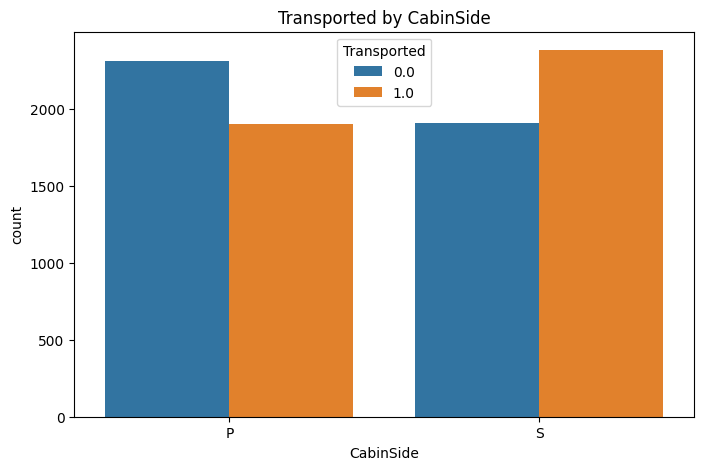

In [51]:
show_graph_column_vs_transported('CabinSide')

## Destination
"The planet the passenger will be debarking to."

In [52]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

In [53]:
show_corr_columns(['Transported', 'Destination'])

                           Transported
Transported                      100.0
Destination_55 Cancri e           11.0
Destination_PSO J318.5-22          0.0
Destination_TRAPPIST-1e           -9.0


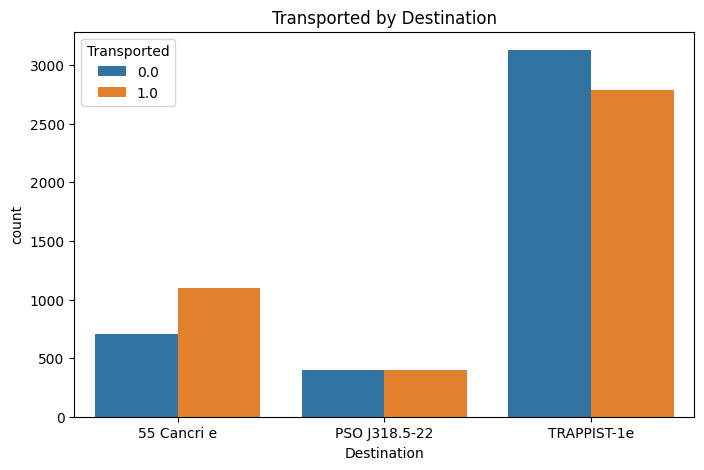

In [54]:
show_graph_column_vs_transported('Destination')

Changing Destination names to values according to transported rates:<br>
TRAPPIST-1e - 1 <br>
PSO J318.5-22 - 2 <br>
55 Cancri e - 3 <br>

In [55]:
df['Destination'] = df['Destination'].map({'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3})
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupSize,Companion,CabinDeck,CabinSide
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,0,B,P
1,3.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,0,F,S
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,2,1,A,S
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,2,1,A,S
4,3.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,0,F,S


In [56]:
show_corr_columns(['Transported', 'Destination'])

             Transported
Transported        100.0
Destination         11.0


## Age
"The age of the passenger."

In [57]:
show_corr_columns(['Transported', 'Age'])

             Transported
Transported        100.0
Age                 -8.0


Nothing to change

## VIP
"Whether the passenger has paid for special VIP service during the voyage."

In [58]:
df['VIP'].value_counts()

VIP
0.0    12401
1.0      273
Name: count, dtype: int64

In [59]:
show_corr_columns(['Transported', 'VIP'])

             Transported
Transported        100.0
VIP                 -4.0


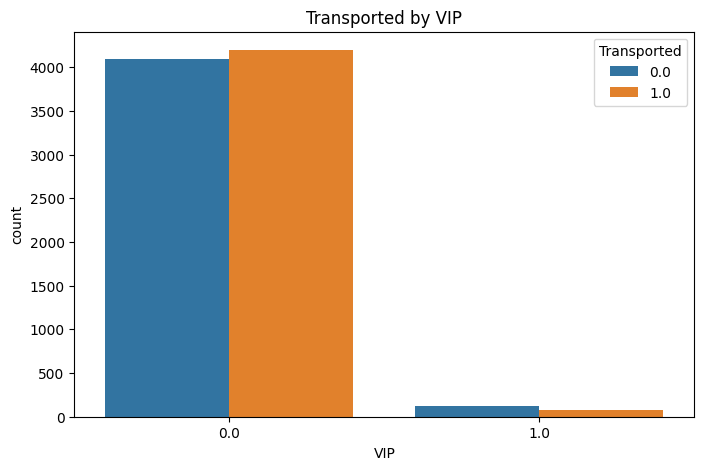

In [60]:
show_graph_column_vs_transported('VIP')

Nothing to change

## RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
"Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities."

In [61]:
show_corr_columns(['Transported', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

              Transported
Transported         100.0
FoodCourt             5.0
ShoppingMall          1.0
VRDeck              -21.0
Spa                 -22.0
RoomService         -24.0


In [62]:
# ShoppingMall has correlation near 0, so I'm dropping it
df.drop(columns='ShoppingMall', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   12682 non-null  float64
 1   CryoSleep    12660 non-null  float64
 2   Destination  12696 non-null  float64
 3   Age          12700 non-null  float64
 4   VIP          12674 non-null  float64
 5   RoomService  12707 non-null  float64
 6   FoodCourt    12681 non-null  float64
 7   Spa          12686 non-null  float64
 8   VRDeck       12702 non-null  float64
 9   Name         12676 non-null  object 
 10  Transported  8693 non-null   float64
 11  GroupSize    12970 non-null  int64  
 12  Companion    12970 non-null  int64  
 13  CabinDeck    12671 non-null  object 
 14  CabinSide    12671 non-null  object 
dtypes: float64(10), int64(2), object(3)
memory usage: 1.6+ MB


Nothing more to change

## Name

I'll take the surname and see if it have correlation with transported

In [63]:
df['Surname'] = df['Name'].str.split().str[1]
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Name,Transported,GroupSize,Companion,CabinDeck,CabinSide,Surname
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,0,B,P,Ofracculy
1,3.0,0.0,1.0,24.0,0.0,109.0,9.0,549.0,44.0,Juanna Vines,1.0,1,0,F,S,Vines
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,6715.0,49.0,Altark Susent,0.0,2,1,A,S,Susent
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,3329.0,193.0,Solam Susent,0.0,2,1,A,S,Susent
4,3.0,0.0,1.0,16.0,0.0,303.0,70.0,565.0,2.0,Willy Santantines,1.0,1,0,F,S,Santantines


In [64]:
df['Surname'].value_counts()

Surname
Buckentry      19
Belley         19
Hinglendez     18
Fowlesterez    18
Casonston      18
               ..
Rackepery       1
Unretereng      1
Metful          1
Dertering       1
Gemoserad       1
Name: count, Length: 2406, dtype: int64

**New column "SurnameCount"** <br>
This column contains the number of people with the same Surname

In [65]:
surname_value_counts = df['Surname'].value_counts().sort_index()
df['SurnameCount'] = df['Surname'].map(surname_value_counts)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Name,Transported,GroupSize,Companion,CabinDeck,CabinSide,Surname,SurnameCount
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,0,B,P,Ofracculy,3.0
1,3.0,0.0,1.0,24.0,0.0,109.0,9.0,549.0,44.0,Juanna Vines,1.0,1,0,F,S,Vines,4.0
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,6715.0,49.0,Altark Susent,0.0,2,1,A,S,Susent,7.0
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,3329.0,193.0,Solam Susent,0.0,2,1,A,S,Susent,7.0
4,3.0,0.0,1.0,16.0,0.0,303.0,70.0,565.0,2.0,Willy Santantines,1.0,1,0,F,S,Santantines,9.0


In [66]:
show_corr_columns(['Transported', 'SurnameCount'])

              Transported
Transported         100.0
SurnameCount         -6.0


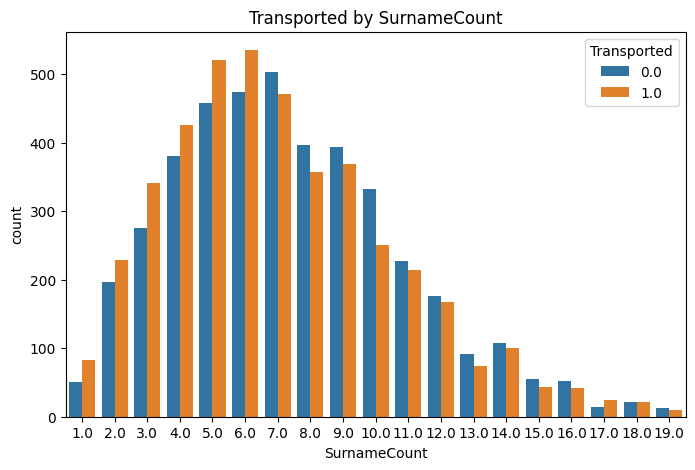

In [67]:
show_graph_column_vs_transported('SurnameCount')

It seems that the more people with the same surname, the fewer people are transported <br>
I'll keep this columns and drop Name and Surname that aren't needed anymore

In [68]:
df.drop(columns=['Name', 'Surname'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  float64
 1   CryoSleep     12660 non-null  float64
 2   Destination   12696 non-null  float64
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  float64
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   Spa           12686 non-null  float64
 8   VRDeck        12702 non-null  float64
 9   Transported   8693 non-null   float64
 10  GroupSize     12970 non-null  int64  
 11  Companion     12970 non-null  int64  
 12  CabinDeck     12671 non-null  object 
 13  CabinSide     12671 non-null  object 
 14  SurnameCount  12676 non-null  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 1.6+ MB


# Missing values

In [69]:
df.isna().sum()

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
Spa              284
VRDeck           268
Transported     4277
GroupSize          0
Companion          0
CabinDeck        299
CabinSide        299
SurnameCount     294
dtype: int64

## HomePlanet

In [70]:
df['HomePlanet'] = df['HomePlanet'].fillna(-1)

In [71]:
df['HomePlanet'].value_counts()

HomePlanet
 3.0    6865
 1.0    3133
 2.0    2684
-1.0     288
Name: count, dtype: int64

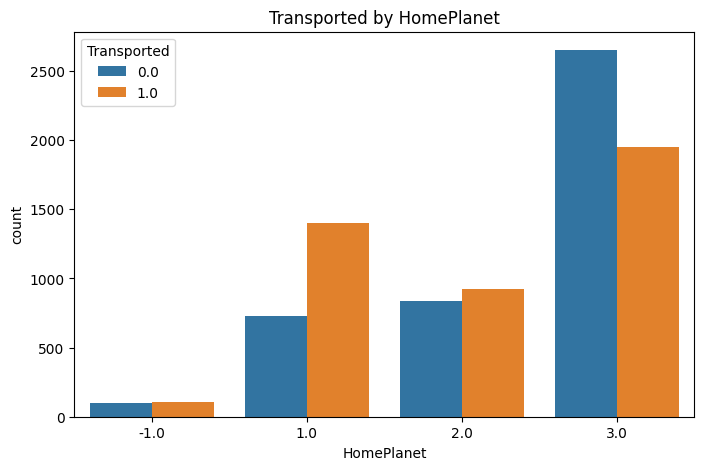

In [72]:
show_graph_column_vs_transported('HomePlanet')

I'm filling missing HomePlanet with 2, because "planet 2" is similiar in transported rates with missing HomePlanet

In [73]:
df['HomePlanet'] = df['HomePlanet'].replace({-1: 2})
df['HomePlanet'].value_counts()

HomePlanet
3.0    6865
1.0    3133
2.0    2972
Name: count, dtype: int64

In [74]:
df['HomePlanet'] = df['HomePlanet'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int64  
 1   CryoSleep     12660 non-null  float64
 2   Destination   12696 non-null  float64
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  float64
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   Spa           12686 non-null  float64
 8   VRDeck        12702 non-null  float64
 9   Transported   8693 non-null   float64
 10  GroupSize     12970 non-null  int64  
 11  Companion     12970 non-null  int64  
 12  CabinDeck     12671 non-null  object 
 13  CabinSide     12671 non-null  object 
 14  SurnameCount  12676 non-null  float64
dtypes: float64(10), int64(3), object(2)
memory usage: 1.6+ MB


In [75]:
df.isna().sum()

HomePlanet         0
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
Spa              284
VRDeck           268
Transported     4277
GroupSize          0
Companion          0
CabinDeck        299
CabinSide        299
SurnameCount     294
dtype: int64

## CryoSleep

In [76]:
df['CryoSleep'] = df['CryoSleep'].fillna(-1)

In [77]:
df['CryoSleep'].value_counts()

CryoSleep
 0.0    8079
 1.0    4581
-1.0     310
Name: count, dtype: int64

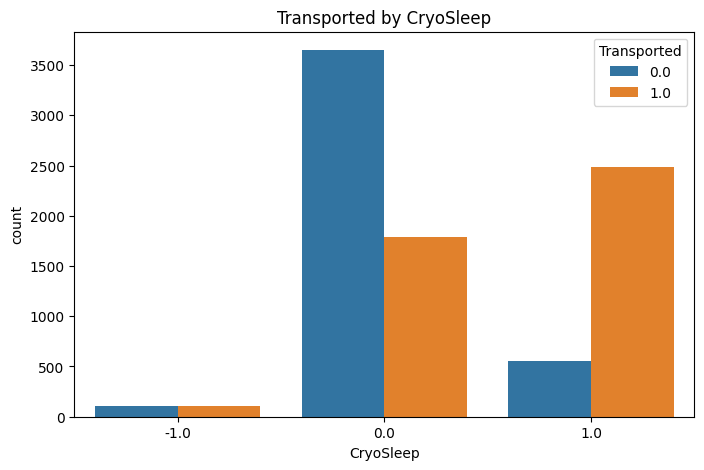

In [78]:
show_graph_column_vs_transported('CryoSleep')

Since CryoSleep 0 and 1 aren't similar to missing values, I'm going to fill with the one that is "more similar"

In [79]:
df['CryoSleep'] = df['CryoSleep'].replace({-1: 0})
df['CryoSleep'].value_counts()

CryoSleep
0.0    8389
1.0    4581
Name: count, dtype: int64

In [80]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int64  
 1   CryoSleep     12970 non-null  int64  
 2   Destination   12696 non-null  float64
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  float64
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   Spa           12686 non-null  float64
 8   VRDeck        12702 non-null  float64
 9   Transported   8693 non-null   float64
 10  GroupSize     12970 non-null  int64  
 11  Companion     12970 non-null  int64  
 12  CabinDeck     12671 non-null  object 
 13  CabinSide     12671 non-null  object 
 14  SurnameCount  12676 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 1.6+ MB


In [81]:
df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
Spa              284
VRDeck           268
Transported     4277
GroupSize          0
Companion          0
CabinDeck        299
CabinSide        299
SurnameCount     294
dtype: int64

## Destination

In [82]:
df['Destination'] = df['Destination'].fillna(-1)

In [83]:
df['Destination'].value_counts()

Destination
 1.0    8871
 3.0    2641
 2.0    1184
-1.0     274
Name: count, dtype: int64

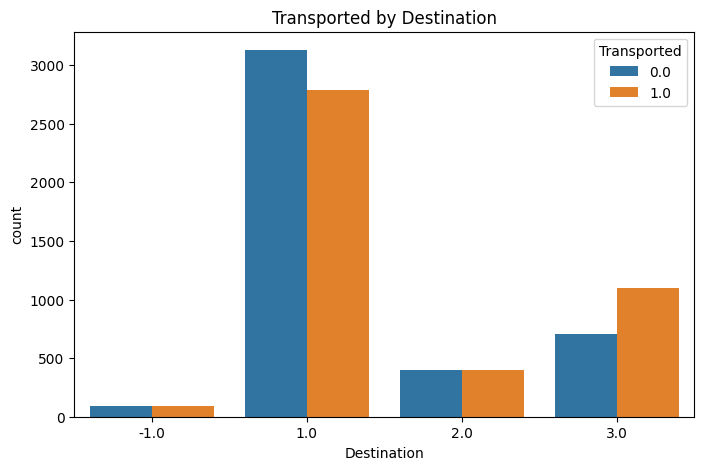

In [84]:
show_graph_column_vs_transported('Destination')

In [85]:
df['Destination'] = df['Destination'].replace({-1: 2})
df['Destination'].value_counts()

Destination
1.0    8871
3.0    2641
2.0    1458
Name: count, dtype: int64

In [86]:
df['Destination'] = df['Destination'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int64  
 1   CryoSleep     12970 non-null  int64  
 2   Destination   12970 non-null  int64  
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  float64
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   Spa           12686 non-null  float64
 8   VRDeck        12702 non-null  float64
 9   Transported   8693 non-null   float64
 10  GroupSize     12970 non-null  int64  
 11  Companion     12970 non-null  int64  
 12  CabinDeck     12671 non-null  object 
 13  CabinSide     12671 non-null  object 
 14  SurnameCount  12676 non-null  float64
dtypes: float64(8), int64(5), object(2)
memory usage: 1.6+ MB


In [87]:
df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age              270
VIP              296
RoomService      263
FoodCourt        289
Spa              284
VRDeck           268
Transported     4277
GroupSize          0
Companion          0
CabinDeck        299
CabinSide        299
SurnameCount     294
dtype: int64

## Age

I'll try to find columns that have significant correlation with Age and fill in some way

In [88]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'Spa', 'VRDeck', 'Transported', 'GroupSize', 'Companion',
       'CabinDeck', 'CabinSide', 'SurnameCount'],
      dtype='object')

In [89]:
show_corr_columns(['Age', 'HomePlanet', 'CryoSleep', 'Destination', 'RoomService',
       'FoodCourt', 'Spa', 'VRDeck', 'Transported', 'GroupSize', 'Companion', 'CabinDeck', 'CabinSide', 'SurnameCount'])

                Age
Age           100.0
FoodCourt      12.0
CabinDeck_C    12.0
Spa            12.0
VRDeck         10.0
CabinDeck_B    10.0
CabinDeck_D     8.0
CabinDeck_A     8.0
RoomService     7.0
CabinDeck_E     4.0
CabinSide_S     1.0
CabinDeck_T     1.0
Destination     1.0
CabinDeck_F    -2.0
CabinSide_P    -2.0
CryoSleep      -6.0
Transported    -8.0
Companion     -13.0
SurnameCount  -15.0
GroupSize     -18.0
CabinDeck_G   -21.0
HomePlanet    -24.0


HomePlanet has a significant correlation. So I'm going to take the mean age of each HomePlanet and fill NaN ages according to HomePlanet mean age

In [90]:
for planet in df['HomePlanet'].unique():
    print(f'Planet: {planet}', df.query(f"HomePlanet == {planet}")['Age'].mean())

Planet: 1 34.33615911313988
Planet: 3 25.961995249406176
Planet: 2 29.41491197790818


In [91]:
for planet in df['HomePlanet'].unique():
    age_mean = df.query(f"HomePlanet == {planet}")['Age'].mean()
    indexes = df.query(f"HomePlanet == {planet}")['Age'].isna().index
    df.loc[indexes, 'Age'] = df.loc[indexes, 'Age'].fillna(age_mean)

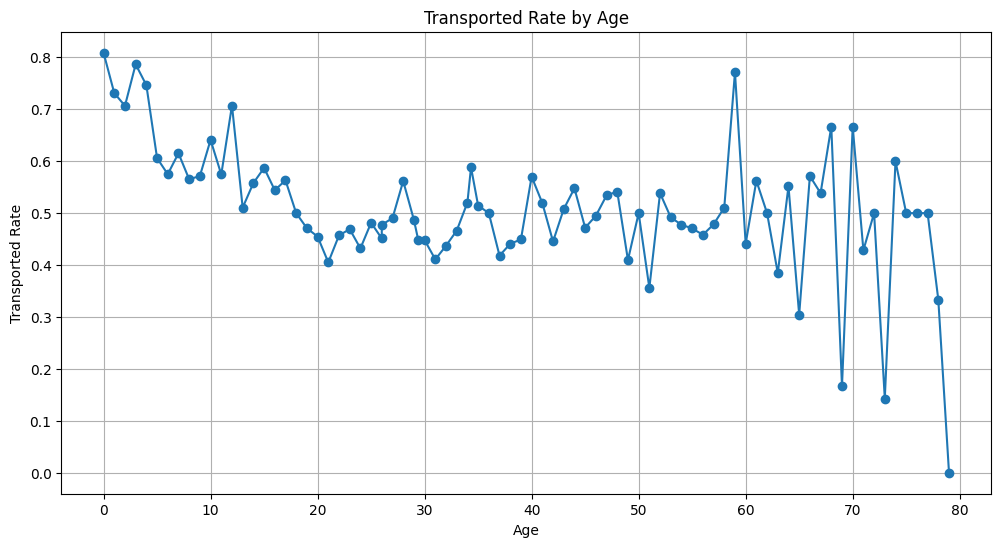

In [ ]:
age_transported_rate = df.groupby('Age')['Transported'].mean()
plt.figure(figsize=(12, 6))
plt.plot(age_transported_rate.index, age_transported_rate.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Transported Rate')
plt.title('Transported Rate by Age')
plt.grid(True)
plt.show()

It seems that the older a passenger is, the less likely they is to be transported

In [93]:
df[df['Age'] % 1 != 0]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,GroupSize,Companion,CabinDeck,CabinSide,SurnameCount
50,3,0,1,25.995428,0.0,4.0,0.0,4683.0,0.0,0.0,1,0,G,S,8.0
64,2,0,1,34.336159,0.0,793.0,0.0,253.0,0.0,0.0,1,0,E,S,3.0
137,3,1,3,25.995428,0.0,0.0,0.0,0.0,0.0,1.0,1,0,G,S,9.0
181,1,0,3,34.336159,0.0,0.0,2433.0,878.0,443.0,1.0,2,1,A,P,7.0
184,1,0,3,34.336159,0.0,2.0,1720.0,1125.0,122.0,1.0,1,0,C,S,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,2,1,1,34.336159,0.0,0.0,0.0,0.0,0.0,NaN,1,0,F,S,4.0
4216,3,1,1,25.995428,0.0,0.0,0.0,0.0,0.0,NaN,1,0,G,P,9.0
4229,1,1,3,34.336159,0.0,0.0,0.0,0.0,0.0,NaN,2,1,C,P,2.0
4274,2,1,3,29.405903,0.0,0.0,0.0,0.0,0.0,NaN,1,0,D,P,4.0


There's some decimal ages, so I'm going to keep this column as float

In [94]:
df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP              296
RoomService      263
FoodCourt        289
Spa              284
VRDeck           268
Transported     4277
GroupSize          0
Companion          0
CabinDeck        299
CabinSide        299
SurnameCount     294
dtype: int64

## VIP

In [95]:
df['VIP'] = df['VIP'].fillna(-1)

In [96]:
df['VIP'].value_counts()

VIP
 0.0    12401
-1.0      296
 1.0      273
Name: count, dtype: int64

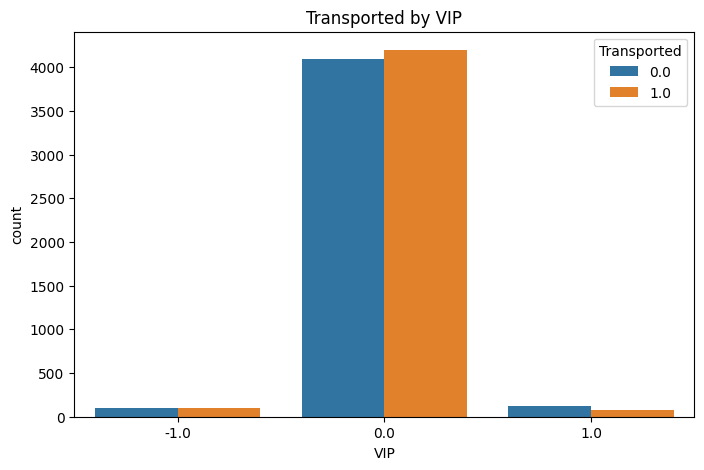

In [97]:
show_graph_column_vs_transported('VIP')

The 2 transported rates are similiar with missing VIP, so I'm filling with the largest one

In [98]:
df['VIP'] = df['VIP'].replace({-1: 0})
df['VIP'].value_counts()

VIP
0.0    12697
1.0      273
Name: count, dtype: int64

In [99]:
df['VIP'] = df['VIP'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int64  
 1   CryoSleep     12970 non-null  int64  
 2   Destination   12970 non-null  int64  
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  int64  
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   Spa           12686 non-null  float64
 8   VRDeck        12702 non-null  float64
 9   Transported   8693 non-null   float64
 10  GroupSize     12970 non-null  int64  
 11  Companion     12970 non-null  int64  
 12  CabinDeck     12671 non-null  object 
 13  CabinSide     12671 non-null  object 
 14  SurnameCount  12676 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 2.1+ MB


## RoomService, FoodCourt, Spa, VRDeck
I'm doing the same process I did in Age

Obviously, people who slept didn't spend anything, so I'll fill in the missing service values like this: for passengers who were awake, I'll fill missing values using the mean service value calculated for their HomePlanet. For those who slept, I'll fill the missing values with 0

In [100]:
for planet in df['HomePlanet'].unique():
    print(f'Planet {planet} RoomService mean: ', df.query(f"HomePlanet == {planet} and CryoSleep == 0")['RoomService'].mean())

Planet 1 RoomService mean:  245.63794100636207
Planet 3 RoomService mean:  195.012801365479
Planet 2 RoomService mean:  828.4137548530227


In [101]:
def fill_services_based_on_homeplanet_in_column(column):
    for planet in df['HomePlanet'].unique():
        room_mean = df.query(f"HomePlanet == {planet} and CryoSleep == 0")[column].mean()
        indexes = df.query(f"HomePlanet == {planet} and CryoSleep == 0")[column].isna().index
        df.loc[indexes, column] = df.loc[indexes, column].fillna(room_mean)
    df[column] = df[column].fillna(0)

In [102]:
fill_services_based_on_homeplanet_in_column('RoomService')
fill_services_based_on_homeplanet_in_column('FoodCourt')
fill_services_based_on_homeplanet_in_column('Spa')
fill_services_based_on_homeplanet_in_column('VRDeck')

In [103]:
df.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
Spa                0
VRDeck             0
Transported     4277
GroupSize          0
Companion          0
CabinDeck        299
CabinSide        299
SurnameCount     294
dtype: int64

## CabinDeck

In [104]:
df['CabinDeck'] = df['CabinDeck'].fillna('-1')

In [105]:
df['CabinDeck'].value_counts()

CabinDeck
F     4239
G     3781
E     1323
B     1141
C     1102
D      720
A      354
-1     299
T       11
Name: count, dtype: int64

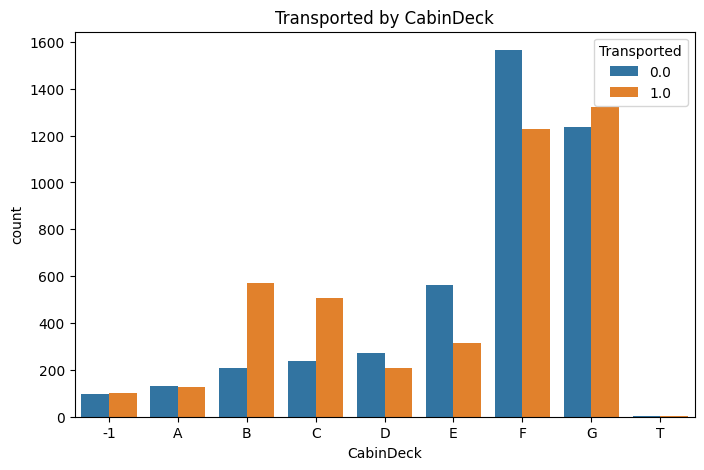

In [106]:
show_graph_column_vs_transported('CabinDeck')

I'm filling with T CabinDeck

In [107]:
df['CabinDeck'] = df['CabinDeck'].replace({'-1': 'T'})
df['CabinDeck'].value_counts()

CabinDeck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T     310
Name: count, dtype: int64

In [108]:
df['CabinDeck'] = df['CabinDeck'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    12970 non-null  int64   
 1   CryoSleep     12970 non-null  int64   
 2   Destination   12970 non-null  int64   
 3   Age           12970 non-null  float64 
 4   VIP           12970 non-null  int64   
 5   RoomService   12970 non-null  float64 
 6   FoodCourt     12970 non-null  float64 
 7   Spa           12970 non-null  float64 
 8   VRDeck        12970 non-null  float64 
 9   Transported   8693 non-null   float64 
 10  GroupSize     12970 non-null  int64   
 11  Companion     12970 non-null  int64   
 12  CabinDeck     12970 non-null  category
 13  CabinSide     12671 non-null  object  
 14  SurnameCount  12676 non-null  float64 
dtypes: category(1), float64(7), int64(6), object(1)
memory usage: 2.0+ MB


## CabinSide

In [109]:
df['CabinSide'] = df['CabinSide'].fillna('-1')

In [110]:
df['CabinSide'].value_counts()

CabinSide
S     6381
P     6290
-1     299
Name: count, dtype: int64

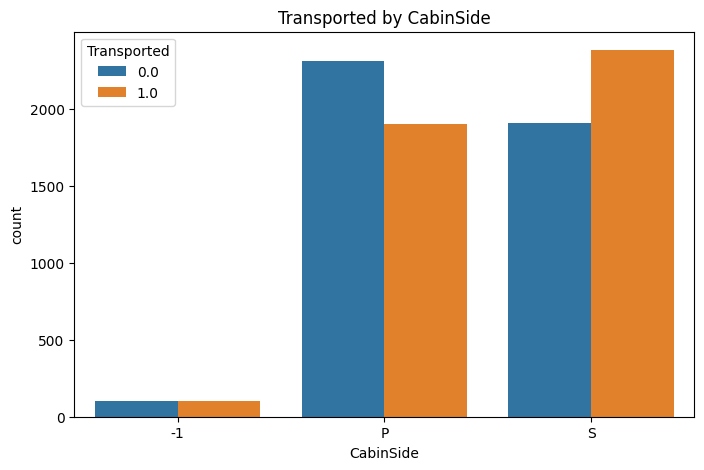

In [111]:
show_graph_column_vs_transported('CabinSide')

None of the CabinSide is similar to missing value, so I'll keep as "-1"

In [112]:
df['CabinSide'] = df['CabinSide'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    12970 non-null  int64   
 1   CryoSleep     12970 non-null  int64   
 2   Destination   12970 non-null  int64   
 3   Age           12970 non-null  float64 
 4   VIP           12970 non-null  int64   
 5   RoomService   12970 non-null  float64 
 6   FoodCourt     12970 non-null  float64 
 7   Spa           12970 non-null  float64 
 8   VRDeck        12970 non-null  float64 
 9   Transported   8693 non-null   float64 
 10  GroupSize     12970 non-null  int64   
 11  Companion     12970 non-null  int64   
 12  CabinDeck     12970 non-null  category
 13  CabinSide     12970 non-null  category
 14  SurnameCount  12676 non-null  float64 
dtypes: category(2), float64(7), int64(6)
memory usage: 1.9 MB


## SurnameCount

In [113]:
df['SurnameCount'] = df['SurnameCount'].fillna(-1)

In [114]:
df['SurnameCount'].value_counts()

SurnameCount
 7.0     1505
 6.0     1452
 5.0     1440
 4.0     1204
 9.0     1170
 8.0     1128
 3.0      912
 10.0     880
 2.0      642
 11.0     627
 12.0     516
 14.0     322
-1.0      294
 13.0     234
 1.0      208
 15.0     165
 16.0     128
 18.0      54
 17.0      51
 19.0      38
Name: count, dtype: int64

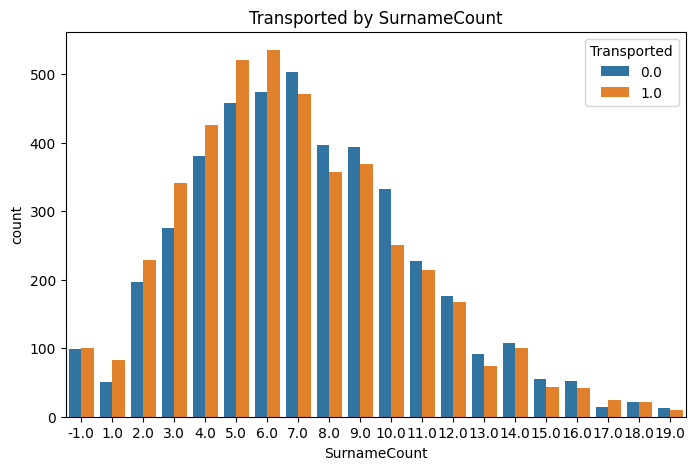

In [115]:
show_graph_column_vs_transported('SurnameCount')

I'm filling with 6 which is the one with more counts

In [116]:
df['SurnameCount'] = df['SurnameCount'].replace({-1: 6})
df['SurnameCount'].value_counts()

SurnameCount
6.0     1746
7.0     1505
5.0     1440
4.0     1204
9.0     1170
8.0     1128
3.0      912
10.0     880
2.0      642
11.0     627
12.0     516
14.0     322
13.0     234
1.0      208
15.0     165
16.0     128
18.0      54
17.0      51
19.0      38
Name: count, dtype: int64

In [117]:
df['SurnameCount'] = df['SurnameCount'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    12970 non-null  int64   
 1   CryoSleep     12970 non-null  int64   
 2   Destination   12970 non-null  int64   
 3   Age           12970 non-null  float64 
 4   VIP           12970 non-null  int64   
 5   RoomService   12970 non-null  float64 
 6   FoodCourt     12970 non-null  float64 
 7   Spa           12970 non-null  float64 
 8   VRDeck        12970 non-null  float64 
 9   Transported   8693 non-null   float64 
 10  GroupSize     12970 non-null  int64   
 11  Companion     12970 non-null  int64   
 12  CabinDeck     12970 non-null  category
 13  CabinSide     12970 non-null  category
 14  SurnameCount  12970 non-null  int64   
dtypes: category(2), float64(6), int64(7)
memory usage: 1.9 MB


# Outliers

## Age

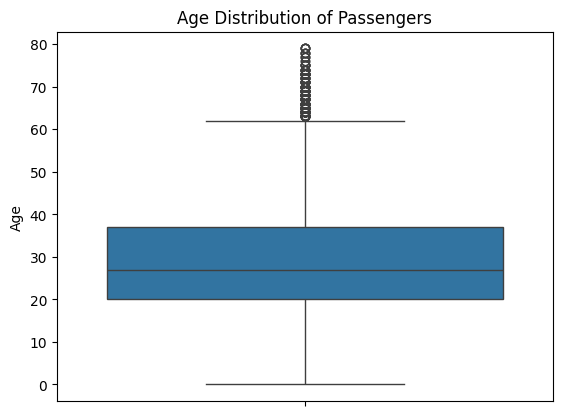

In [118]:
show_boxplot_column(df, 'Age')

In [119]:
df['Age'].max()

np.float64(79.0)

No outliers

## RoomService, FoodCourt, Spa, VRDeck

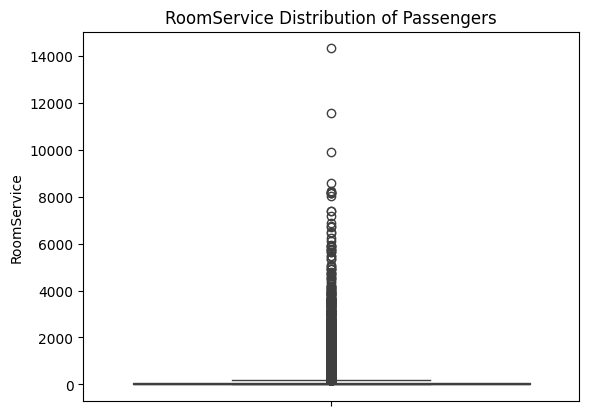

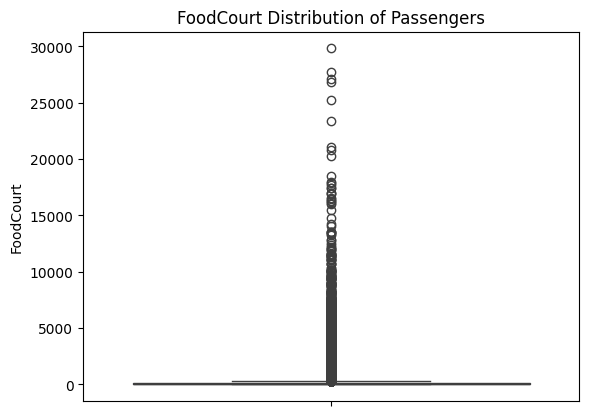

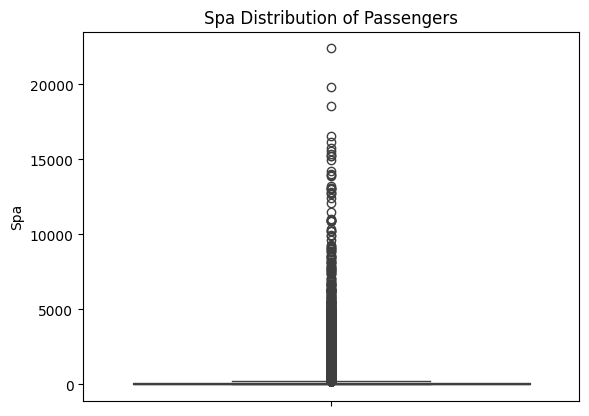

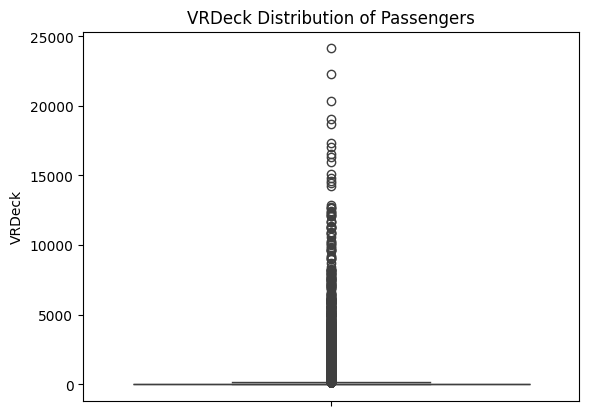

In [120]:
show_boxplot_column(df, 'RoomService')
show_boxplot_column(df, 'FoodCourt')
show_boxplot_column(df, 'Spa')
show_boxplot_column(df, 'VRDeck')

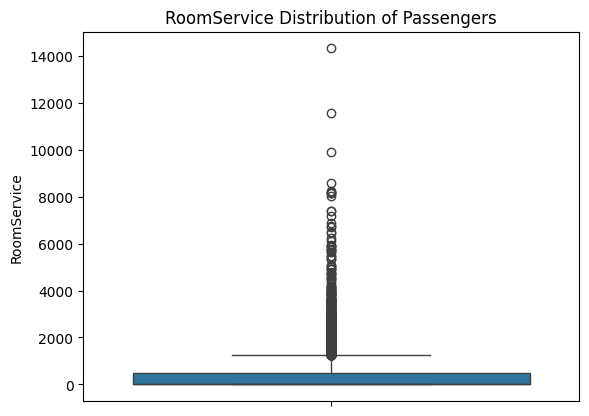

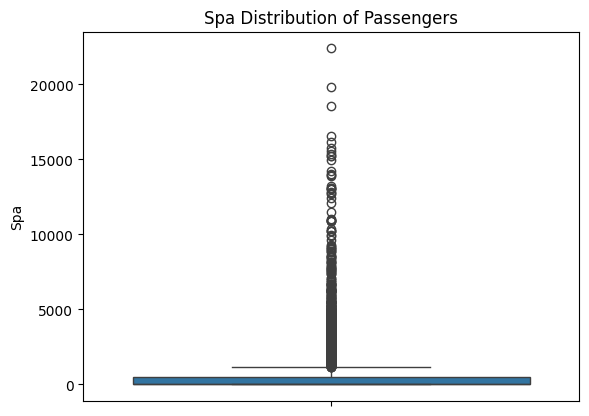

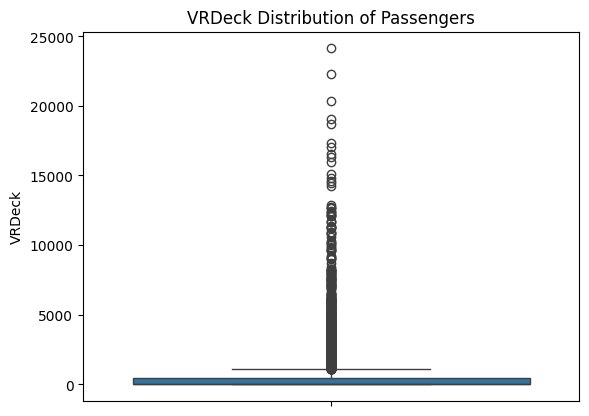

In [121]:
df_without0 = df.query("(RoomService != 0) or (Spa != 0) or (VRDeck != 0)")
show_boxplot_column(df_without0, 'RoomService')
show_boxplot_column(df_without0, 'Spa')
show_boxplot_column(df_without0, 'VRDeck')

I'll consider the services high values as outliers. For treating it, I'll change the high values with the Upper Whisker (desconsidering rows with 0)

In [122]:
outliers_columns = ['RoomService', 'Spa', 'VRDeck']
for column in outliers_columns:
    Q1 = df_without0[column].quantile(0.25)
    Q3 = df_without0[column].quantile(0.75)
    IQR = Q3 - Q1
    high_outlier_value = Q3 + 1.5 * IQR
    low_outlier_value = Q3 - 1.5 * IQR

    high_indexes = df.query(f"{column} > {high_outlier_value}").index
    df.loc[high_indexes, column] = high_outlier_value
    low_indexes = df.query(f"{column} < {low_outlier_value}").index
    df.loc[low_indexes, column] = low_outlier_value

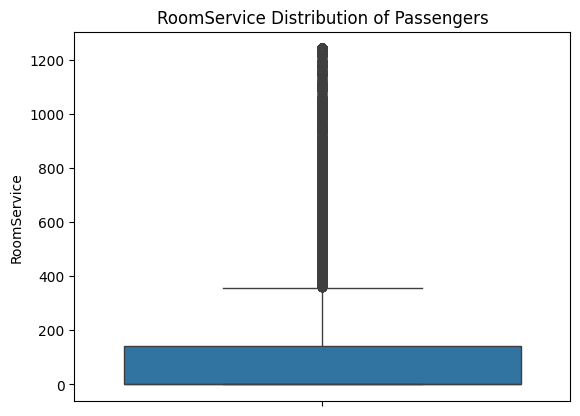

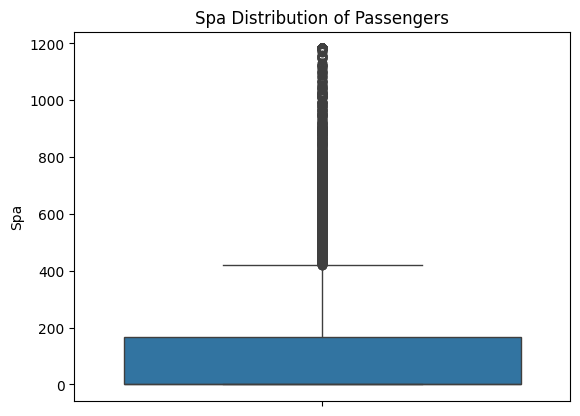

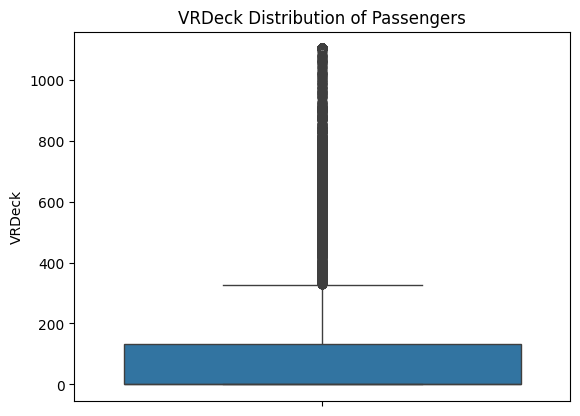

In [123]:
show_boxplot_column(df, 'RoomService')
show_boxplot_column(df, 'Spa')
show_boxplot_column(df, 'VRDeck')

# OneHotEncoder

In [124]:
ohe = OneHotEncoder(drop='if_binary')
categorical_columns = df.select_dtypes('category').columns.tolist()

In [125]:
df_ohe = pd.DataFrame(ohe.fit_transform(df[categorical_columns]).toarray(),
                      columns=ohe.get_feature_names_out(categorical_columns))
df_ohe.head()

,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_-1,CabinSide_P,CabinSide_S
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [126]:
df_not_encoded = df.drop(columns=categorical_columns).reset_index(drop=True)
df_not_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,GroupSize,Companion,SurnameCount
0,1,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,3
1,3,0,1,24.0,0,109.0,9.0,1182.5,44.0,1.0,1,0,4
2,1,0,1,58.0,1,43.0,3576.0,1182.5,49.0,0.0,2,1,7
3,1,0,1,33.0,0,0.0,1283.0,1182.5,193.0,0.0,2,1,7
4,3,0,1,16.0,0,303.0,70.0,565.0,2.0,1.0,1,0,9


In [127]:
df_2 = pd.concat([df_not_encoded, df_ohe], axis=1)
df_2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_-1,CabinSide_P,CabinSide_S
0,1,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,0,1,24.0,0,109.0,9.0,1182.5,44.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,1,58.0,1,43.0,3576.0,1182.5,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,1,33.0,0,0.0,1283.0,1182.5,193.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,0,1,16.0,0,303.0,70.0,565.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Exporting

In [128]:
index_test_df = train_df.tail(1).index[0] + 1
df_2.iloc[index_test_df-2:index_test_df+2]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_-1,CabinSide_P,CabinSide_S
8691,1,0,3,32.0,0,0.0,1049.0,353.0,1103.125,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8692,1,0,1,44.0,0,126.0,4688.0,0.0,12.000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8693,3,1,1,27.0,0,0.0,0.0,0.0,0.000,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8694,3,0,1,19.0,0,0.0,9.0,1182.5,0.000,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [129]:
df_2.iloc[:index_test_df].to_csv('data/preprocessed_train.csv', index=False)
df_2.iloc[index_test_df:].to_csv('data/preprocessed_test.csv', index=False)